In [ ]:
pip install path

In [ ]:
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# Loading data
#file_path = Path("/content/AAPL.csv")
df = pd.read_csv('/content/AAPL.csv')
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
917,2019-08-26,51.47,51.80,51.26,51.62,51.12,104174400,0.072340,888.0
918,2019-08-27,51.97,52.14,50.88,51.04,50.54,103493200,0.117541,962.0
919,2019-08-28,51.03,51.43,50.83,51.38,50.88,63755200,0.061477,895.0
920,2019-08-29,52.13,52.33,51.67,52.25,51.74,83962000,0.056460,1083.0
921,2019-08-30,52.54,52.61,51.80,52.19,51.67,84573600,0.106096,1005.0


In [ ]:
#Dataframe with Date, Adj close,  Volume, ts_polarity, twitter_volume of APPL
appl_df = df[["Date", "Adj Close", "Volume", "ts_polarity", "twitter_volume"]]
appl_df.head()

,Date,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,24.44,270597600,0.070389,1133.0
1,2016-01-05,23.83,223164000,0.133635,1430.0
2,2016-01-06,23.36,273829600,0.072042,1949.0
3,2016-01-07,22.38,324377600,0.074369,2289.0
4,2016-01-08,22.50,283192000,0.051595,2235.0


In [ ]:
# Setting Index as Date
appl_df = appl_df.dropna()
appl_df.set_index("Date", inplace = True)
appl_df.tail()

,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,
2019-08-26,51.12,104174400,0.072340,888.0
2019-08-27,50.54,103493200,0.117541,962.0
2019-08-28,50.88,63755200,0.061477,895.0
2019-08-29,51.74,83962000,0.056460,1083.0
2019-08-30,51.67,84573600,0.106096,1005.0


In [ ]:
sentiment = []
for score in appl_df['ts_polarity']:
    if score >= 0.05 :
          sentiment.append("Positive")
    elif score <= - 0.05 :
          sentiment.append("Negative")
    else :
        sentiment.append("Neutral")

appl_df["Sentiment"] = sentiment
appl_df.head()

,Adj Close,Volume,ts_polarity,twitter_volume,Sentiment
Date,,,,,
2016-01-04,24.44,270597600,0.070389,1133.0,Positive
2016-01-05,23.83,223164000,0.133635,1430.0,Positive
2016-01-06,23.36,273829600,0.072042,1949.0,Positive
2016-01-07,22.38,324377600,0.074369,2289.0,Positive
2016-01-08,22.50,283192000,0.051595,2235.0,Positive


In [ ]:
appl_df['Price Diff'] = appl_df['Adj Close'].diff()
appl_df.dropna(inplace = True)
appl_df['Trend'] = np.where(
    appl_df['Price Diff'] > 0 , 1, 0)

appl_df.head()

,Adj Close,Volume,ts_polarity,twitter_volume,Sentiment,Price Diff,Trend
Date,,,,,,,
2016-01-05,23.83,223164000,0.133635,1430.0,Positive,-0.61,0
2016-01-06,23.36,273829600,0.072042,1949.0,Positive,-0.47,0
2016-01-07,22.38,324377600,0.074369,2289.0,Positive,-0.98,0
2016-01-08,22.50,283192000,0.051595,2235.0,Positive,0.12,1
2016-01-11,22.86,198957600,0.019443,1222.0,Neutral,0.36,1


In [ ]:
appl_trend = appl_df[["Adj Close", "Volume", 'twitter_volume', "Sentiment", "Trend"]]
appl_trend = pd.get_dummies(appl_trend, columns=["Sentiment"])
appl_trend.head()

,Adj Close,Volume,twitter_volume,Trend,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,,,,
2016-01-05,23.83,223164000,1430.0,0,0,0,1
2016-01-06,23.36,273829600,1949.0,0,0,0,1
2016-01-07,22.38,324377600,2289.0,0,0,0,1
2016-01-08,22.50,283192000,2235.0,1,0,0,1
2016-01-11,22.86,198957600,1222.0,1,0,1,0


In [ ]:
# Defining features set
X = appl_trend.copy()
X.drop("Trend", axis=1, inplace=True)
X.head()

,Adj Close,Volume,twitter_volume,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
Date,,,,,,
2016-01-05,23.83,223164000,1430.0,0,0,1
2016-01-06,23.36,273829600,1949.0,0,0,1
2016-01-07,22.38,324377600,2289.0,0,0,1
2016-01-08,22.50,283192000,2235.0,0,0,1
2016-01-11,22.86,198957600,1222.0,0,1,0


In [ ]:
y = appl_trend["Trend"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
# Splitting into Train and Test sets
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [ ]:
# Create RFClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())


# Make predictions
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5306859205776173


In [ ]:
# Make predictions
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5306859205776173


In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,37,90
Actual 1,40,110


<b><h3> Regressor Model

In [ ]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "ts_polarity", "twitter_volume"]]
df.head()

,Adj Close,ts_polarity,twitter_volume
0,24.44,0.070389,1133.0
1,23.83,0.133635,1430.0
2,23.36,0.072042,1949.0
3,22.38,0.074369,2289.0
4,22.50,0.051595,2235.0


In [ ]:
# pct change based on Adj close value
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()

,Adj Close,ts_polarity,twitter_volume,Pct_change
1,23.83,0.133635,1430.0,-0.024959
2,23.36,0.072042,1949.0,-0.019723
3,22.38,0.074369,2289.0,-0.041952
4,22.50,0.051595,2235.0,0.005362
5,22.86,0.019443,1222.0,0.016000


<h4><b> Creating targets

In [ ]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    X_volume = []
    y = []
    for i in range(len(df) - window):

        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]

        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)

    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

In [ ]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [ ]:
# Use 70% of the data for training and the remainder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

<h4><b> Scaling

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
model = RandomForestRegressor(n_estimators=1000, max_depth=2, bootstrap=False, min_samples_leaf=1)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, max_depth=2, n_estimators=1000)

<h4><b> Model Performance

In [ ]:
# Make some predictions
predicted = model.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('R-squared :', r2_score(y_test, predicted))

Root Mean Squared Error: 0.09930152157590298
R-squared : 0.8226886949030799


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
646,46.39,47.215169
647,46.13,47.215169
648,46.22,47.215169
649,48.95,47.215169
650,50.38,47.215169


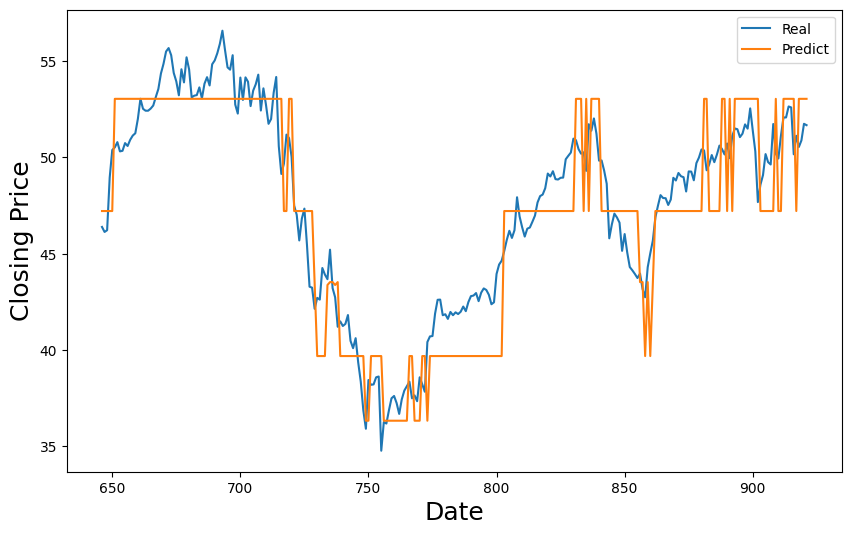

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(stocks['Real'])
plt.plot(stocks['Predicted'])
plt.legend(['Real','Predict'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

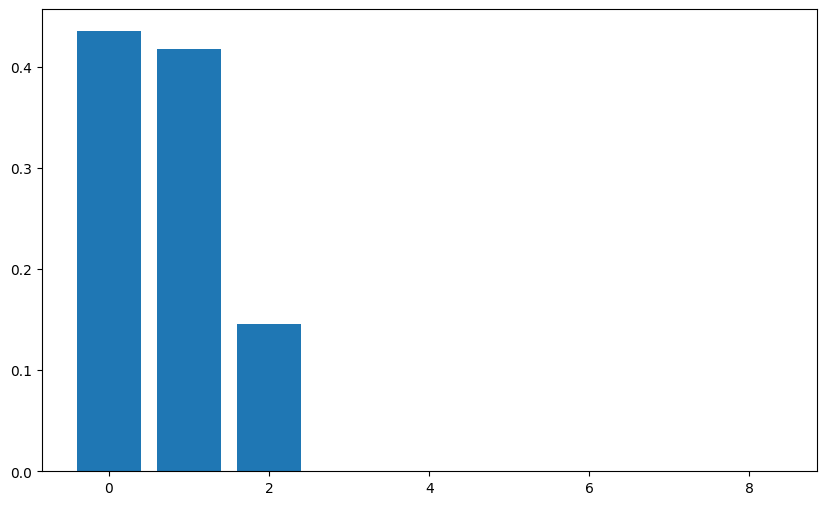

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

sorted_indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()

<h4><b>Extreme Gradient Regressor Model

In [ ]:
# Create the XG Boost regressor instance
model_2 = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model_2.fit(X_train, y_train.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make some predictions
predicted = model_2.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('R-squared :', r2_score(y_test, predicted))

Root Mean Squared Error: 0.049457278193592046
R-squared : 0.9560169801948357


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
646,46.39,47.404716
647,46.13,45.852699
648,46.22,46.514023
649,48.95,45.884335
650,50.38,49.053230


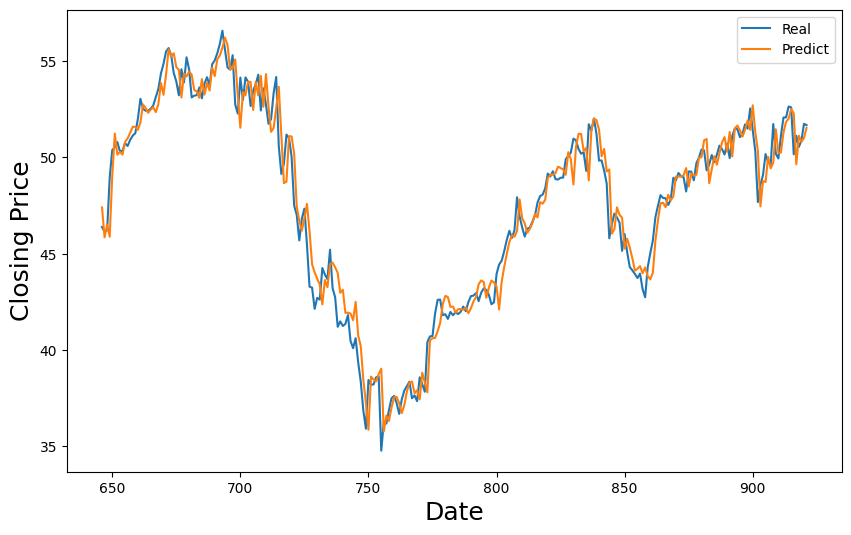

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(stocks['Real'])
plt.plot(stocks['Predicted'])
plt.legend(['Real','Predict'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()